In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
iris = datasets.load_iris()
X = iris.data  # Features (including petal length and petal width)
y = iris.target  # Target labels (iris species)


### Part one 

In [3]:
from sklearn.preprocessing import StandardScaler

# simplify the scaler for easy usage
sc= StandardScaler()

# scaling the features in X
X_scaled = sc.fit_transform(X)


In [4]:
 
from sklearn.model_selection import train_test_split
# split the dataset in the following subsets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                 test_size=0.3,stratify=y,
                                                 random_state=42)

## plotting the explained variance ratio

In [ ]:
from sklearn.decomposition import PCA

pca =PCA

# explained variance ratio

exp_variance_ratio = pca.explained_variance_ratio_
cummulative_VR = np.cumsum(exp_variance_ratio)

pca.fit(X_scaled)

plt.figure(figsize=(12,7))

# individual variances explained 

plt.subplot(1,2,1)
plt.bar(range(1,len(exp_variance_ratio)+1),exp_variance_ratio)
plt.xlabel('principle components')
plt.ylabel('explained variance ratio')
plt.title('Explained variance ratio per principal component')

# cummulative explained variance ratio

plt.subplot(1,2,1)
plt.plot(range(1,len()))

In [10]:
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def DecisionRegions(X, y, classifier, test_idx=None, resolution=0.02):
    # Apply Linear Discriminant Analysis (LDA) to the data
   
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')



In [11]:
## modelling

from sklearn.linear_model import LogisticRegression


pca = PCA(n_components=2)
LR = LogisticRegression(multi_class='ovr',
                        random_state=42,
                        solver='lbfgs')

In [12]:
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
# fitting the logistic regression model

LR.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', random_state=42)

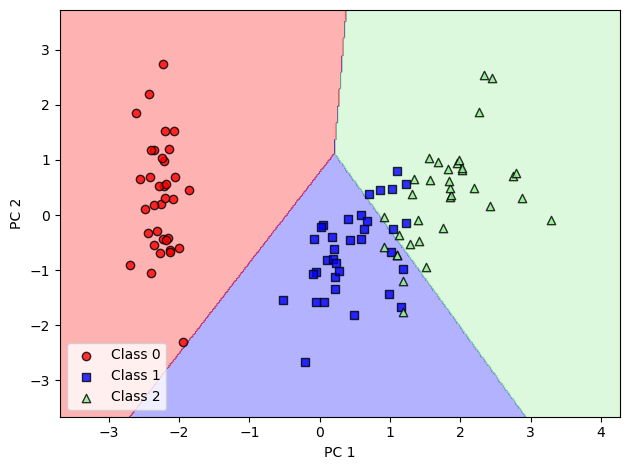

In [14]:
DecisionRegions(X_train_pca, y_train, classifier=LR)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('pca1.png', dpi=300)
plt.show()

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# set n_components to 2 because we want to classify this data set(c-1)
lda= LDA(n_components=2)

X_lda= lda.fit_transform(X_scaled,y)